In [2]:
import pandas as pd
# pd.set_option('max_colwidth', 50)
# set this if you need to

The Health Department has developed an inspection report and scoring system. 
After conducting an inspection of the facility, the Health Inspector calculates a score based on the violations observed. 
Violations can fall into:
- **high risk category**: records specific violations that directly relate to the transmission of food borne illnesses,the adulteration of food products and the contamination of food-contact surfaces.
- **moderate risk category**: records specific violations that are of a moderate risk to the public health and safety.
- **low risk category**: records violations that are low risk or have no immediate risk to the public health and safety.

In [3]:
businesses = pd.read_csv('businesses_plus.csv', parse_dates=True, dtype={'phone_number': str})
businesses
# dtype casts the column as a specific data type

,business_id,name,address,city,postal_code,latitude,longitude,phone_number,TaxCode,business_certificate,application_date,owner_name,owner_address,owner_city,owner_state,owner_zip
0,10,Tiramisu Kitchen,033 Belden Pl,San Francisco,94104,37.791116,-122.403816,NaN,H24,779059.0,NaN,Tiramisu LLC,33 Belden St,San Francisco,CA,94104
1,19,Nrgize Lifestyle Cafe,"1200 Van Ness Ave, 3rd Floor",San Francisco,94109,37.786848,-122.421547,NaN,H24,NaN,NaN,24 Hour Fitness Inc,"1200 Van Ness Ave, 3rd Floor",San Francisco,CA,94109
2,24,OMNI S.F. Hotel - 2nd Floor Pantry,"500 California St, 2nd Floor",San Francisco,94104,37.792888,-122.403135,NaN,H24,352312.0,NaN,OMNI San Francisco Hotel Corp,"500 California St, 2nd Floor",San Francisco,CA,94104
3,31,Norman's Ice Cream and Freezes,2801 Leavenworth St,San Francisco,94133,37.807155,-122.419004,NaN,H24,346882.0,NaN,Norman Antiforda,2801 Leavenworth St,San Francisco,CA,94133
4,45,CHARLIE'S DELI CAFE,3202 FOLSOM St,S.F.,94110,37.747114,-122.413641,NaN,H24,340024.0,10/10/2001,"HARB, CHARLES AND KRISTIN",1150 SANCHEZ,S.F.,CA,94114
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7539,87165,The Rainbow,4401 18th St,SF,94114,NaN,NaN,14155822018,H07,NaN,03/30/2016,Samer Jubrail Soudah,403 Hall St.,San Carlos,CA,94070
7540,87200,Hot Dog Bills,599 Skyline Blvd #1 Lakeside,SF,94132,NaN,NaN,14150874301,H26,NaN,04/01/2016,Hot Dog Bills Inc,675 Santa Barbara Ave.,Millbrae,CA,94031
7541,87201,Oolong Noodles Restaurant,646 Washington St,NaN,94111,NaN,NaN,NaN,H26,1029660.0,04/01/2016,Hung Dat Lai,2687 Mission Street,San Francisco,CA,94110
7542,87202,Hot Dog Bills,599 Skyline Blvd #2 Driving Range,SF,94132,NaN,NaN,14150874301,H26,301235.0,04/01/2016,Hot Dog Bills Inc,675 Santa Barbara Ave.,Millbrae,CA,94031


In [4]:
inspections = pd.read_csv('inspections_plus.csv', parse_dates=True)
inspections

,business_id,Score,date,type
0,10,NaN,20140807,Reinspection/Followup
1,10,94.0,20140729,Routine - Unscheduled
2,10,NaN,20140124,Reinspection/Followup
3,10,92.0,20140114,Routine - Unscheduled
4,19,94.0,20141110,Routine - Unscheduled
...,...,...,...,...
27280,86990,NaN,20160318,New Ownership
27281,87021,NaN,20160331,New Construction
27282,87121,NaN,20160330,New Ownership
27283,87122,NaN,20160401,New Ownership


In [5]:
violations = pd.read_csv('violations_plus.csv', parse_dates=True)
violations

,business_id,date,ViolationTypeID,risk_category,description
0,10,20140114,103154,Low Risk,Unclean or degraded floors walls or ceilings
1,10,20140114,103119,Moderate Risk,Inadequate and inaccessible handwashing facili...
2,10,20140114,103145,Low Risk,Improper storage of equipment utensils or linens
3,10,20140729,103129,Moderate Risk,Insufficient hot water or running water
4,10,20140729,103144,Low Risk,Unapproved or unmaintained equipment or utensils
...,...,...,...,...,...
39715,86774,20160321,103139,Low Risk,Improper food storage
39716,86845,20160329,103124,Moderate Risk,Inadequately cleaned or sanitized food contact...
39717,86845,20160329,103139,Low Risk,Improper food storage
39718,86845,20160329,103144,Low Risk,Unapproved or unmaintained equipment or utensils


In [6]:
# 1 Combine the three dataframes into one data frame called restaurant_scores
# Hint: http://pandas.pydata.org/pandas-docs/stable/merging.html
violations_inspections = violations.merge(inspections, on=['date','business_id'])
restaurant_scores = violations_inspections.merge(businesses, on='business_id')
restaurant_scores


,business_id,date,ViolationTypeID,risk_category,description,Score,type,name,address,city,...,longitude,phone_number,TaxCode,business_certificate,application_date,owner_name,owner_address,owner_city,owner_state,owner_zip
0,10,20140114,103154,Low Risk,Unclean or degraded floors walls or ceilings,92.0,Routine - Unscheduled,Tiramisu Kitchen,033 Belden Pl,San Francisco,...,-122.403816,NaN,H24,779059.0,NaN,Tiramisu LLC,33 Belden St,San Francisco,CA,94104
1,10,20140114,103119,Moderate Risk,Inadequate and inaccessible handwashing facili...,92.0,Routine - Unscheduled,Tiramisu Kitchen,033 Belden Pl,San Francisco,...,-122.403816,NaN,H24,779059.0,NaN,Tiramisu LLC,33 Belden St,San Francisco,CA,94104
2,10,20140114,103145,Low Risk,Improper storage of equipment utensils or linens,92.0,Routine - Unscheduled,Tiramisu Kitchen,033 Belden Pl,San Francisco,...,-122.403816,NaN,H24,779059.0,NaN,Tiramisu LLC,33 Belden St,San Francisco,CA,94104
3,10,20140729,103129,Moderate Risk,Insufficient hot water or running water,94.0,Routine - Unscheduled,Tiramisu Kitchen,033 Belden Pl,San Francisco,...,-122.403816,NaN,H24,779059.0,NaN,Tiramisu LLC,33 Belden St,San Francisco,CA,94104
4,10,20140729,103144,Low Risk,Unapproved or unmaintained equipment or utensils,94.0,Routine - Unscheduled,Tiramisu Kitchen,033 Belden Pl,San Francisco,...,-122.403816,NaN,H24,779059.0,NaN,Tiramisu LLC,33 Belden St,San Francisco,CA,94104
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43748,86845,20160329,103139,Low Risk,Improper food storage,NaN,New Ownership,Yonkers Cafe Inc,3815 Noriega St,SF,...,NaN,14155930675,H24,NaN,03/08/2016,Yonkers Café Inc,3815 Noreiga St.,SF,CA,94122
43749,86845,20160329,103144,Low Risk,Unapproved or unmaintained equipment or utensils,90.0,Routine - Unscheduled,Yonkers Cafe Inc,3815 Noriega St,SF,...,NaN,14155930675,H24,NaN,03/08/2016,Yonkers Café Inc,3815 Noreiga St.,SF,CA,94122
43750,86845,20160329,103144,Low Risk,Unapproved or unmaintained equipment or utensils,NaN,New Ownership,Yonkers Cafe Inc,3815 Noriega St,SF,...,NaN,14155930675,H24,NaN,03/08/2016,Yonkers Café Inc,3815 Noreiga St.,SF,CA,94122
43751,86845,20160329,103151,Low Risk,Inadequate or unsanitary refuse containers or ...,90.0,Routine - Unscheduled,Yonkers Cafe Inc,3815 Noriega St,SF,...,NaN,14155930675,H24,NaN,03/08/2016,Yonkers Café Inc,3815 Noreiga St.,SF,CA,94122


In [7]:
# 2 Which ten business have had the most inspections?
inspections.value_counts(['business_id']).head(10)


business_id
1775           21
74374          20
2505           20
67154          19
74131          19
71618          19
71804          19
7747           18
489            18
4803           17
dtype: int64

In [8]:
# 3 Group and count the inspections by type
inspections.groupby(['type']).count()

,business_id,Score,date
type,,,
Administrative or Document Review,4,0,4
Complaint,1634,0,1634
Complaint Reinspection/Followup,163,0,163
Foodborne Illness Investigation,100,0,100
Multi-agency Investigation,2,0,2
New Construction,1613,0,1613
New Ownership,1877,0,1877
Non-inspection site visit,840,0,840
Reinspection/Followup,5386,3,5386


<AxesSubplot:xlabel='month'>

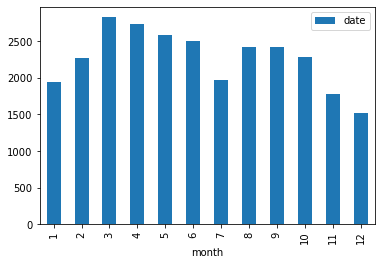

In [9]:
# 4 Create a plot that shows number of inspections per month
# Bonus for creating a heatmap
# http://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.heatmap.html?highlight=heatmap

inspections.dtypes
inspections['date'] = pd.to_datetime(inspections['date'], format='%Y%m%d')
inspections['month'] = inspections['date'].dt.month
by_month = inspections.groupby('month').count()
by_month
by_month.plot.bar(y='date')


In [10]:
# 5 Which zip code contains the most high risk violations?
high_risk = restaurant_scores[restaurant_scores['risk_category']=='High Risk']
high_risk.value_counts('owner_zip').head()

owner_zip
94133    514
94110    438
94109    423
94122    421
94102    308
dtype: int64

In [11]:
# 6 If inspection is prompted by a change in restaurant ownership, 
# is the inspection more likely to be categorized as higher or lower risk?
change_own = restaurant_scores[restaurant_scores['type']=='New Ownership']
change_own.value_counts('risk_category')

risk_category
Low Risk         553
Moderate Risk    419
High Risk        148
dtype: int64

In [12]:
# 7 Examining the descriptions, what is the most common violation?
violations.value_counts('description')

description
Unclean or degraded floors walls or ceilings                          3395
Moderate risk food holding temperature                                2621
Inadequate and inaccessible handwashing facilities                    2444
Unapproved or unmaintained equipment or utensils                      2335
Wiping cloths not clean or properly stored or inadequate sanitizer    2294
                                                                      ... 
Discharge from employee nose mouth or eye                                4
Improperly displayed mobile food permit or signage                       2
No restroom facility within 200 feet of mobile food facility             1
Noncompliance with Gulf Coast oyster regulation                          1
Noncompliance of vending machine                                         1
Length: 69, dtype: int64

<AxesSubplot:ylabel='Frequency'>

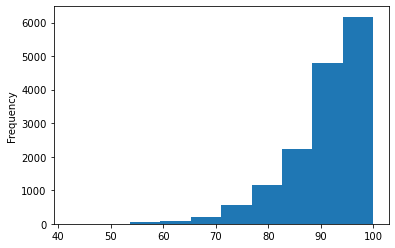

In [13]:
# 8 Create a hist of the scores with 10 bins

inspections['Score'].plot.hist(bins=10)

<AxesSubplot:xlabel='city,risk_category'>

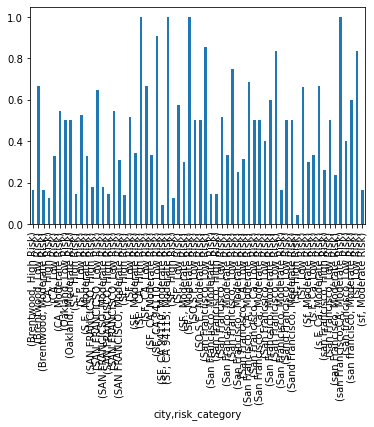

In [14]:
# 9 Can you predict risk category based on the other features in this dataset?
city = restaurant_scores.groupby(['city','risk_category'])['date'].count() / restaurant_scores.groupby(['city'])['date'].count()
city.plot.bar('risk_category')


In [22]:
violation_id = restaurant_scores.groupby('ViolationTypeID')['risk_category'].value_counts()
print(violation_id)
#different violation ids are linked to different risk categories

ViolationTypeID  risk_category
103101           High Risk           6
103102           High Risk         762
103103           High Risk        1711
103104           High Risk          93
103105           High Risk         818
                                  ... 
103172           High Risk          20
103175           Moderate Risk       2
103176           Moderate Risk       5
103177           Low Risk           12
103178           Low Risk            5
Name: risk_category, Length: 69, dtype: int64


In [34]:
inspection_type = restaurant_scores.groupby('type')['risk_category'].value_counts()
type_count = restaurant_scores.groupby('type').count()
#inspection_type_prop = inspection_type.merge('type_count', on='type')
#print(inspection_type_prop)
inspection_type.plot.bar('risk_category', stacked=True)
#different violation ids are linked to different risk categories

NameError: name 'inspection_type_prop' is not defined

In [ ]:
# 10 Extra Credit:
# Use Instagram location API to find pictures taken at the lat, long of the most High Risk restaurant
# https://www.instagram.com/developer/endpoints/locations/

In [ ]:
############################
### A Little More Morbid ###
############################

In [51]:
killings = pd.read_csv('police-killings.csv')
killings.head()

,Unnamed: 0,name,age,gender,raceethnicity,month,day,year,streetaddress,city,state,lawenforcementagency,cause,armed,county_income
0,0,A'donte Washington,16,Male,Black,February,23,2015,Clearview Ln,Millbrook,AL,Millbrook Police Department,Gunshot,No,54766
1,1,Aaron Rutledge,27,Male,White,April,2,2015,300 block Iris Park Dr,Pineville,LA,Rapides Parish Sheriff's Office,Gunshot,No,40930
2,2,Aaron Siler,26,Male,White,March,14,2015,22nd Ave and 56th St,Kenosha,WI,Kenosha Police Department,Gunshot,No,54930
3,3,Aaron Valdez,25,Male,Hispanic/Latino,March,11,2015,3000 Seminole Ave,South Gate,CA,South Gate Police Department,Gunshot,Firearm,55909
4,4,Adam Jovicic,29,Male,White,March,19,2015,364 Hiwood Ave,Munroe Falls,OH,Kent Police Department,Gunshot,No,49669


In [75]:
# 1. Make the following changed to column names:
# lawenforcementagency -> agency
# raceethnicity        -> race

killings = killings.rename(columns={'Lawenforcementagency' : 'agency', 'raceethnicity' : 'race'})

In [57]:
# 2. Show the count of missing values in each column

killings.isnull().sum()

Unnamed: 0              0
name                    0
age                     0
gender                  0
raceethnicity           0
month                   0
day                     0
year                    0
streetaddress           4
city                    0
state                   0
lawenforcementagency    0
cause                   0
armed                   0
county_income           0
dtype: int64

In [62]:
# 3. replace each null value in the dataframe with the string "Unknown"

killings = killings.fillna('Unknown')
killings
killings.isnull().sum()

Unnamed: 0              0
name                    0
age                     0
gender                  0
raceethnicity           0
month                   0
day                     0
year                    0
streetaddress           0
city                    0
state                   0
lawenforcementagency    0
cause                   0
armed                   0
county_income           0
dtype: int64

In [64]:
# 4. How many killings were there so far in 2015?
killings.groupby('year')['name'].count()

year
2015    467
Name: name, dtype: int64

In [65]:
# 5. Of all killings, how many were male and how many female?

killings.groupby('gender')['name'].count()

gender
Female     22
Male      445
Name: name, dtype: int64

In [68]:
# 6. How many killings were of unarmed people?
killings.groupby('armed')['name'].count()

armed
Disputed                2
Firearm               230
Knife                  68
No                    102
Non-lethal firearm     14
Other                  26
Unknown                 7
Vehicle                18
Name: name, dtype: int64

In [71]:
# 7. What percentage of all killings were unarmed?
killings[killings['armed']=='No']['name'].count() / killings['armed'].count() * 100

21.841541755888652

In [73]:
# 8. What are the 5 states with the most killings?

killings.value_counts('state').head(5)

state
CA    74
TX    46
FL    29
AZ    25
OK    22
dtype: int64

In [76]:
# 9. Show a value counts of deaths for each race
killings.value_counts('race')

race
White                     236
Black                     135
Hispanic/Latino            67
Unknown                    15
Asian/Pacific Islander     10
Native American             4
dtype: int64

array([[<AxesSubplot:title={'center':'age'}>]], dtype=object)

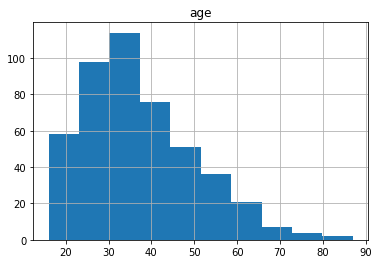

In [77]:
# 10. Display a histogram of ages of all killings

killings.hist('age')

array([[<AxesSubplot:title={'center':'Asian/Pacific Islander'}>,
        <AxesSubplot:title={'center':'Black'}>],
       [<AxesSubplot:title={'center':'Hispanic/Latino'}>,
        <AxesSubplot:title={'center':'Native American'}>],
       [<AxesSubplot:title={'center':'Unknown'}>,
        <AxesSubplot:title={'center':'White'}>]], dtype=object)

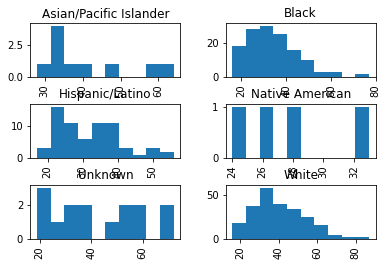

In [78]:
# 11. Show 6 histograms of ages by race

killings.hist('age', by='race')

In [81]:
# 12. What is the average age of death by race?

killings.groupby('race')['age'].mean()

race
Asian/Pacific Islander    40.800000
Black                     34.044444
Hispanic/Latino           31.716418
Native American           27.750000
Unknown                   43.533333
White                     40.466102
Name: age, dtype: float64

<AxesSubplot:xlabel='month'>

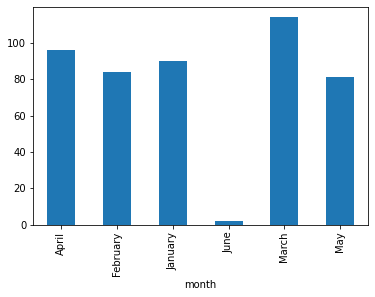

In [86]:
# 13. Show a bar chart with counts of deaths every month

killings_month = killings.groupby('month')['name'].count()
killings_month.plot.bar(y='month')


In [ ]:
###################
### Less Morbid ###
###################

In [ ]:
majors = pd.read_csv('./data/college-majors.csv')
majors.head()

In [ ]:
# 1. Delete the columns (employed_full_time_year_round, major_code)

In [ ]:
# 2. Show the cout of missing values in each column

In [ ]:
# 3. What are the top 10 highest paying majors?

In [ ]:
# 4. Plot the data from the last question in a bar chart, include proper title, and labels!

In [ ]:
# 5. What is the average median salary for each major category?

In [ ]:
# 6. Show only the top 5 paying major categories

In [ ]:
# 7. Plot a histogram of the distribution of median salaries

In [ ]:
# 8. Plot a histogram of the distribution of median salaries by major category

In [ ]:
# 9. What are the top 10 most UNemployed majors?

In [ ]:
# What are the unemployment rates?

In [ ]:
# 10. What are the top 10 most UNemployed majors CATEGORIES? Use the mean for each category
# What are the unemployment rates?

In [ ]:
# 11. the total and employed column refer to the people that were surveyed.
# Create a new column showing the emlpoyment rate of the people surveyed for each major
# call it "sample_employment_rate"
# Example the first row has total: 128148 and employed: 90245. it's 
# sample_employment_rate should be 90245.0 / 128148.0 = .7042

In [ ]:
# 12. Create a "sample_unemployment_rate" column
# this column should be 1 - "sample_employment_rate"